# Практическое задание №1

Промоделировать сложно-пуассоновское распределение с внутренним распределением.



Вариант 1 - биномиальное

In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

Параметры биномиального распределния:

- n - число испытаний
- p - вероятность успеха

In [3]:
nums = 10
prob = 0.5

Функция, генерирующуя выборку с биномиальным распределением

In [4]:
def binom_nums(size):
    return np.random.binomial(n=nums, p=prob, size=size)

Параметры биномиального распределния:

- lam - лямбда

In [5]:
lam = 5

Функция, генерирующуя выборку с распределением Пуассона

In [6]:
def poisson_nums(lam, size):
    return np.random.poisson(lam, size)

Наконец, сложно-пуассоновское распределение

In [7]:
def cpd(binom, poisson, lam, size = 50):
    binom_size = poisson(lam, size)
    cpd_el = map(binom, binom_size)
    return np.array(list(map(sum, cpd_el)))

## Теперь построим полигон частот и вычислим характеристики выборки размера сто тысяч

In [8]:
size = int(10e5)

In [9]:
selection = cpd(binom_nums, poisson_nums, lam, size=size)

In [10]:
counts, bins = np.histogram(selection, 30)

In [11]:
bins_mids = np.array([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])

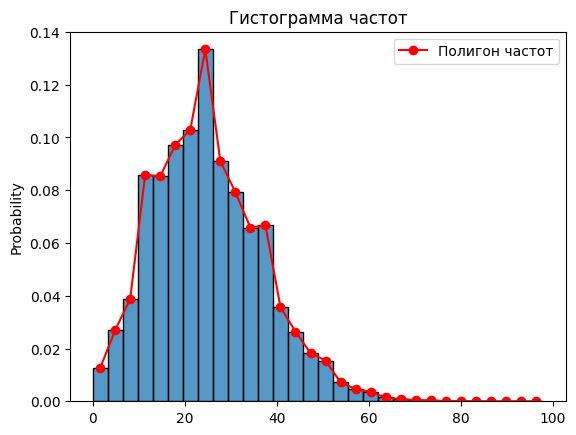

In [12]:
plt.title("Гистограмма частот")
plt.plot(bins_mids, counts/len(selection), color="red", marker='o', label="Полигон частот")
plt.legend()
sns.histplot(data=selection, bins=30, stat="probability");

In [13]:
mean = np.mean(selection)
print(f"Среднее: {mean}")

Среднее: 24.9924


In [14]:
median = np.median(selection)
print(f"Медиана: {median}")

Медиана: 24.0


In [15]:
mode = scipy.stats.mode(selection)
print(f"Мода: {mode[0][0]}")

Мода: 22


In [16]:
dispersion = np.var(selection)
print(f"Дисперсия: {dispersion}")

Дисперсия: 137.33352224


In [17]:
std = np.std(selection)
print(f"Стандартное отклонение: {std}")

Стандартное отклонение: 11.718938614055455


In [18]:
skewness = scipy.stats.skew(selection)
print(f"Асимметрия: {skewness}")

Асимметрия: 0.5019185326053867


In [19]:
kurtosis = scipy.stats.kurtosis(selection)
print(f"Эксцесс: {kurtosis}")

Эксцесс: 0.25756345290000215


## Проверим вычисления через аналитическое выражение первых двух моментов

Производящая функция для сложно-пуассоновского распределения с внутренним биномиальным: 

$$
   h(g(t)) = e^{-\lambda+\lambda g(t)}
$$

$$
  g(t) = (q+pt)^n
$$

$$
    h(g(t)) = e^{-\lambda+\lambda (q+pt)^n}
$$

Для вычисления математического ожидания и дисперсии нам надо знать:

$$ h^\prime (1) $$ и $$ h^{\prime\prime} (1) $$

После приведения формул получаем:

$$ h^\prime (1) = \lambda np $$

$$ h^{\prime\prime}(1) = \lambda np^2(\lambda n + n - 1 ) $$

In [20]:
def h_first():
    return lam*nums*prob

In [26]:
def h_second():
    return lam*nums*prob**2*(lam*nums+nums-1)

In [28]:
print(f"Математическое ожидание = {h_first()}")
print(f"Дисперсия = {h_second() + h_first() - h_first()**2}")

Математическое ожидание = 25.0
Дисперсия = 137.5


Результаты очень близки, к полученным ранее.